# Tesco Locations

Cillian Berragan  
2023-10-16

The following document demonstrates the ability to easily query the
cleaned UK dataset for Tesco shop locations.

## Analysis

1.  Import the required libraries.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

1.  Read in the dataset using `geopandas` and print the first 5 rows.
    -   Mask using the extent of the UK to remove outside points
    -   Filter to only show rows that are brands
    -   Only show some interesting columns

> ***NOTE:** The Local Authority Boundaries for the United Kingdom is
> available
> [here](https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-may-2023-boundaries-uk-buc/explore).*

In [2]:
mask = gpd.GeoSeries(gpd.read_file("~/data/LAD_BUC_2022.gpkg").unary_union, crs=27700)
columns = ["names_value", "category_main", "brand_name_value", "geometry"]

df = gpd.read_parquet("./data/processed/uk_places.parquet", columns=columns)
df = df.to_crs(27700).clip(mask=mask)
print(df.head())

                                  names_value  \
1748728                       The Grand Hotel   
1381348                         Western Lawns   
2135020                      Eastbourne Wheel   
1077423  Mirabelle-The Grand Hotel Eastbourne   
1941320      The Mirabelle at The Grand Hotel   

                            category_main brand_name_value  \
1748728                             hotel             None   
1381348                              park             None   
2135020  landmark_and_historical_building             None   
1077423                             hotel             None   
1941320                        restaurant             None   

                             geometry  
1748728  POINT (560992.840 98184.512)  
1381348  POINT (561116.727 98197.575)  
2135020  POINT (561136.213 98207.202)  
1077423  POINT (561043.378 98213.903)  
1941320  POINT (561039.952 98216.023)  

1.  Show number of Tesco locations

In [3]:
tesco = df.loc[df["brand_name_value"] == "Tesco"]
len(tesco)

2717

1.  Plot Tesco points

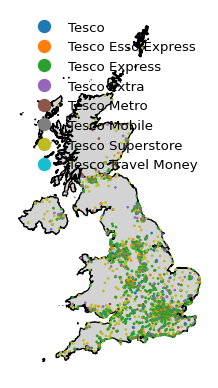

In [4]:
fig, ax = plt.subplots()

gpd.GeoSeries(mask).plot(facecolor="lightgrey", edgecolor="black", ax=ax)
tesco.plot(
    "names_value",
    ax=ax,
    legend=True,
    legend_kwds={"frameon": False},
    markersize=1,
)

ax.axis("off")
plt.show()